In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [3]:
df = pd.read_csv(r"C:\Users\burug\InnomaticsRL\Machine_Learning\Practicles\Penguin_Model\penguins_size.csv")

In [4]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.replace(".",np.nan)
cols = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
df[cols] = df[cols].fillna(df[cols].mean())

In [8]:
df["sex"] = df["sex"].fillna(df["sex"].mode()[0])

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,MALE
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
200,Chinstrap,Dream,51.5,18.7,187.0,3250.0,MALE
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,MALE
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,MALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
187,Chinstrap,Dream,47.5,16.8,199.0,3900.0,FEMALE


In [12]:
cat_cols = ['island', 'sex']
num_cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


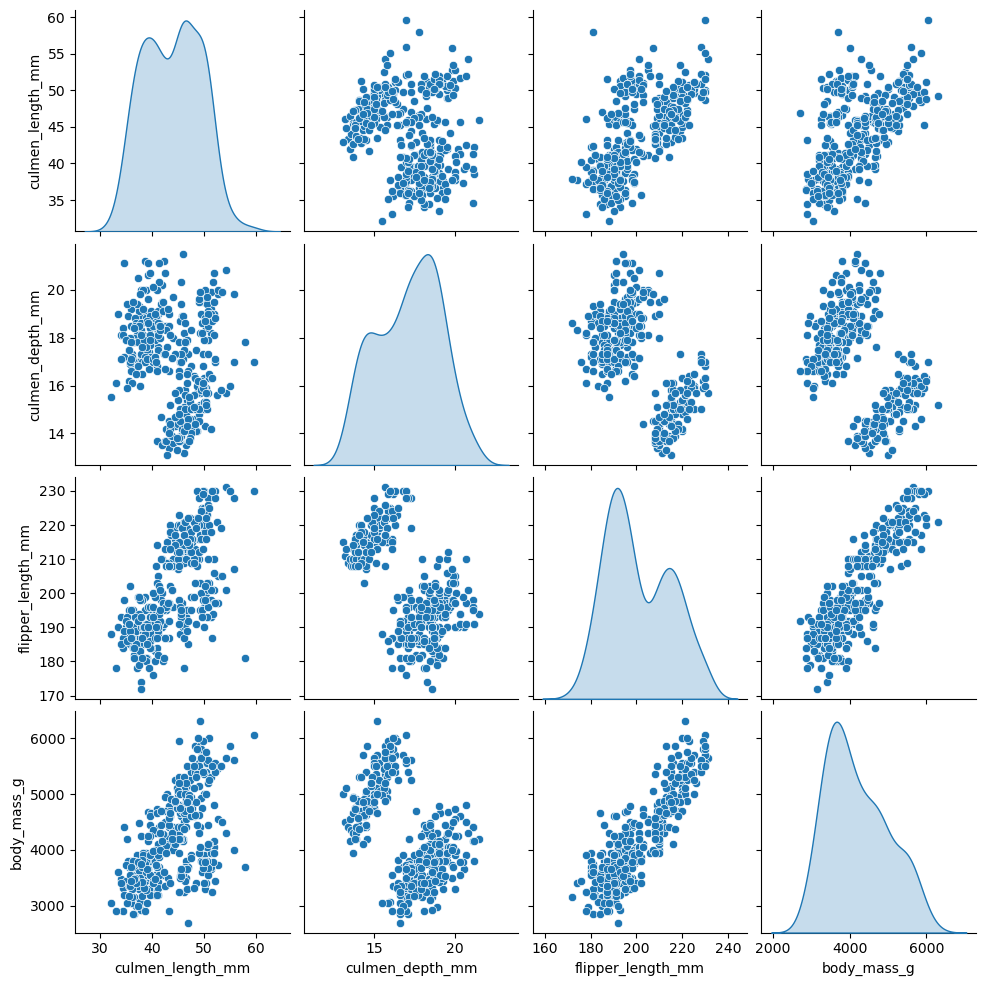

In [15]:
sns.pairplot(df,diag_kind="kde")

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

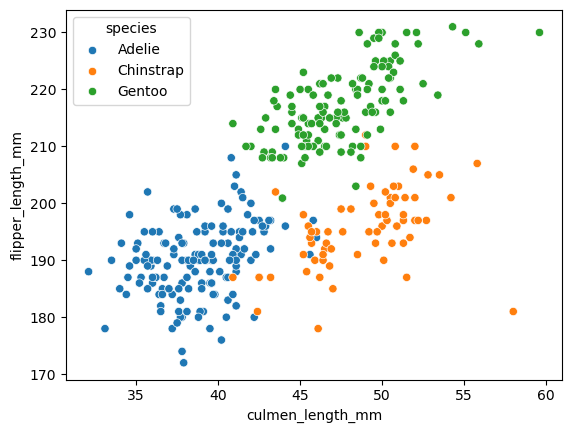

In [16]:
sns.scatterplot(x = df["culmen_length_mm"] , y = df["flipper_length_mm"] , hue=df["species"] )

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler().set_output(transform="pandas")
encode = OneHotEncoder(drop="first",sparse_output=False).set_output(transform="pandas")

In [18]:
x = df.drop(columns="species")
y = df[["species"]]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
x_train.shape

(258, 6)

In [21]:
x_test.shape

(86, 6)

In [22]:
y_train.shape

(258, 1)

In [23]:
x_train_num_scaled = scaler.fit_transform(x_train[num_cols])
x_train_cat_encoded = encode.fit_transform(x_train[cat_cols])

In [24]:
x_train_transformed = pd.concat((x_train_num_scaled,x_train_cat_encoded),axis=1)
x_train_transformed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
17,-0.258357,1.802499,-0.287532,0.373257,0.0,1.0,1.0
24,-0.935679,0.051481,-1.486406,-0.508230,0.0,0.0,1.0
238,0.418965,-1.299304,0.558732,0.751037,0.0,0.0,0.0
145,-0.899067,0.801917,-1.133796,-0.697121,1.0,0.0,1.0
209,0.986451,1.402266,0.135600,-0.193414,1.0,0.0,1.0
254,0.949839,-1.149217,1.334474,1.191781,0.0,0.0,0.0
287,1.023062,-0.448810,1.969172,2.010305,0.0,0.0,1.0
139,-0.770925,0.401685,-0.569620,0.058440,1.0,0.0,1.0
272,0.217599,-1.349333,0.629254,0.247330,0.0,0.0,0.0
179,1.023062,0.952005,-0.075966,-0.508230,1.0,0.0,1.0


In [25]:
x_test_num_scaled = scaler.transform(x_test[num_cols])
x_test_cat_encoded = encode.transform(x_test[cat_cols])
x_test_transformed = pd.concat((x_test_num_scaled,x_test_cat_encoded),axis=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=1),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [28]:
results = {}
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Train
    model.fit(x_train_transformed, y_train)
    
    # Predicting
    y_train_pred = model.predict(x_train_transformed)
    y_pred = model.predict(x_test_transformed)
    results[name] = accuracy_score(y_test, y_pred)
    
    # Evaluation
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Classification Report:\n", classification_report(y_test, y_pred))


===== Logistic Regression =====
Train Accuracy: 0.9922480620155039
Test Accuracy: 0.9883720930232558

===== KNN =====
Train Accuracy: 0.9961240310077519
Test Accuracy: 0.9883720930232558

===== Decision Tree =====
Train Accuracy: 1.0
Test Accuracy: 0.9767441860465116

===== Random Forest =====
Train Accuracy: 1.0
Test Accuracy: 0.9883720930232558

===== AdaBoost =====
Train Accuracy: 0.9728682170542635
Test Accuracy: 0.9883720930232558

===== Gradient Boosting =====
Train Accuracy: 1.0
Test Accuracy: 0.9767441860465116


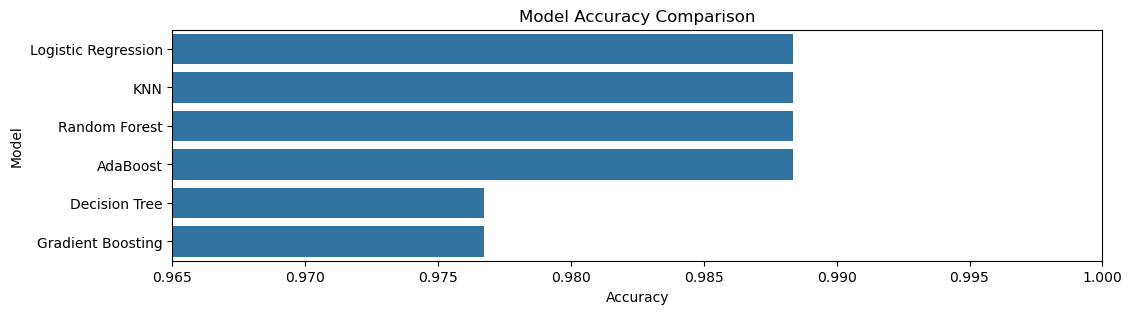

In [29]:
plt.figure(figsize=(12,3))
results_sorted = dict(sorted(results.items(), key=lambda item: item[1],reverse=True))
sns.barplot(
    y=list(results_sorted.keys()),
    x=list(results_sorted.values())
)

plt.xlim(0.965, 1.0)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")

plt.show()

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train_transformed,y_train)
y_train_pred = rf.predict(x_train_transformed)
y_test_pred = rf.predict(x_test_transformed)

print(f"Accuracy for training data : {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy for test data : {accuracy_score(y_test,y_test_pred)}")

Accuracy for training data : 1.0
Accuracy for test data : 0.9883720930232558
